In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import (adjusted_mutual_info_score, adjusted_rand_score,
                             classification_report, f1_score, make_scorer)
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from transform_data import get_train_test_ds

random_state = 42
mlp_layers = [128, 64, 16]
dataset_name = 'income'
dataset_dir = 'data/adult.data'

In [17]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [18]:
f1_scorer = make_scorer(f1_score)
mlp_param_grid = {'mlp__alpha': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'mlp__learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
}

# PCA

In [4]:
scaler = StandardScaler()
pca = PCA(n_components=40, random_state=random_state)
clf = MLPClassifier(
  hidden_layer_sizes=mlp_layers, 
  activation='relu',
  solver='adam',
  learning_rate='adaptive', 
  early_stopping=True, 
  max_iter=128,
  random_state=random_state,
)
pipe = Pipeline([
  ('scaler', scaler), 
  ('pca', pca),
  ('mlp', clf),
])

In [5]:
grid_search = GridSearchCV(estimator=pipe, param_grid=mlp_param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

print("Train F1")
y_train_pred = best_model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print(train_f1_score)

print("Test F1")
y_test_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print(test_f1_score)

Best parameters: {'mlp__alpha': 1e-05, 'mlp__learning_rate_init': 0.001}
Train F1
0.6624764299182904
Test F1
0.6503719447396387


In [19]:
%%time

best_params = {'mlp__alpha': 1e-05, 'mlp__learning_rate_init': 0.001}

pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

CPU times: user 16.3 s, sys: 49.3 s, total: 1min 5s
Wall time: 6.18 s


array([1, 0, 1, ..., 1, 0, 0])

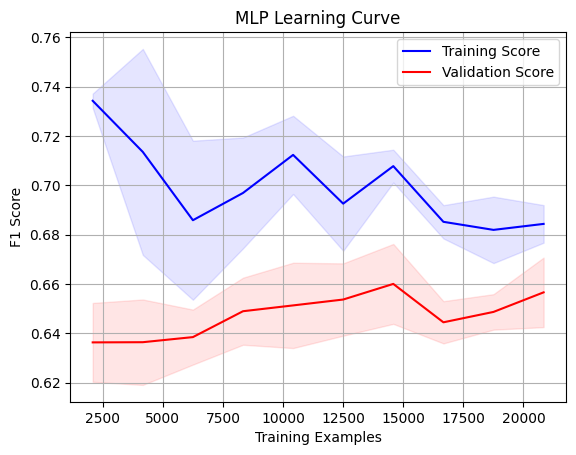

In [7]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=f1_scorer)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes_abs, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('MLP Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# ICA

In [20]:
scaler = StandardScaler()
ica = FastICA(n_components=39, max_iter=500, random_state=random_state)
clf = MLPClassifier(
  hidden_layer_sizes=mlp_layers, 
  activation='relu',
  solver='adam',
  learning_rate='adaptive', 
  early_stopping=True, 
  max_iter=128,
  random_state=random_state,
)
pipe = Pipeline([
  ('scaler', scaler), 
  ('ica', ica),
  ('mlp', clf),
])

In [9]:
grid_search = GridSearchCV(estimator=pipe, param_grid=mlp_param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

print("Train F1")
y_train_pred = best_model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print(train_f1_score)

print("Test F1")
y_test_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print(test_f1_score)

Best parameters: {'mlp__alpha': 0.001, 'mlp__learning_rate_init': 0.001}
Train F1
0.6868721266814235
Test F1
0.681421864520456


In [21]:
%%time

best_params = {'mlp__alpha': 0.001, 'mlp__learning_rate_init': 0.001}

pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

CPU times: user 18.8 s, sys: 56.7 s, total: 1min 15s
Wall time: 7.19 s


array([0, 0, 1, ..., 1, 0, 0])

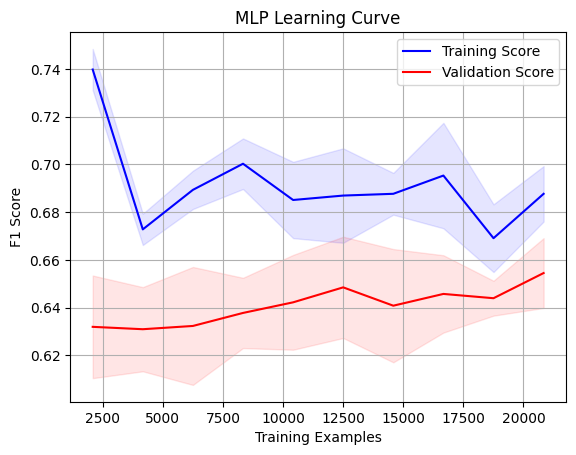

In [11]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=f1_scorer)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes_abs, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('MLP Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Random projection

In [22]:
scaler = StandardScaler()
rca = GaussianRandomProjection(n_components=33, random_state=random_state)
clf = MLPClassifier(
  hidden_layer_sizes=mlp_layers, 
  activation='relu',
  solver='adam',
  learning_rate='adaptive', 
  early_stopping=True, 
  max_iter=128,
  random_state=random_state,
)
pipe = Pipeline([
  ('scaler', scaler), 
  ('rca', rca),
  ('mlp', clf),
])

In [13]:
grid_search = GridSearchCV(estimator=pipe, param_grid=mlp_param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

print("Train F1")
y_train_pred = best_model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print(train_f1_score)

print("Test F1")
y_test_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print(test_f1_score)

Best parameters: {'mlp__alpha': 0.01, 'mlp__learning_rate_init': 0.01}
Train F1
0.6913727156821079
Test F1
0.684922244759973


In [23]:
%%time

best_params = {'mlp__alpha': 0.01, 'mlp__learning_rate_init': 0.01}

pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

CPU times: user 21.9 s, sys: 1min 8s, total: 1min 30s
Wall time: 8.55 s


array([0, 0, 1, ..., 1, 0, 0])

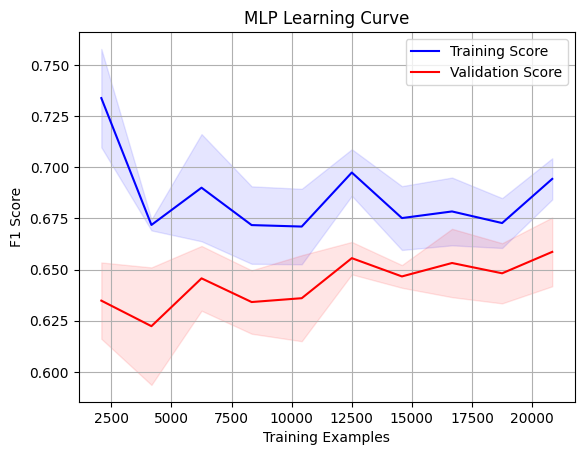

In [15]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=f1_scorer)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes_abs, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('MLP Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# t-SNE

In [11]:
from sklearn.base import BaseEstimator

class CustomTSNE(BaseEstimator):
    def __init__(self, **kwargs):
        self.estimator = TSNE(**kwargs)

    def fit(self, X, y):
        self.estimator.fit(X)
        return self

    def transform(self, X):
        return self.estimator.fit_transform(X)
        
    def fit_transform(self, X, y):
        return self.estimator.fit_transform(X)

In [12]:
scaler = StandardScaler()
tsne = CustomTSNE(n_components=3, n_jobs=-1, random_state=random_state)
clf = MLPClassifier(
  hidden_layer_sizes=mlp_layers, 
  activation='relu',
  solver='adam',
  learning_rate='adaptive', 
  early_stopping=True, 
  max_iter=128,
  random_state=random_state,
)
pipe = Pipeline([
  ('scaler', scaler), 
  ('tsne', tsne),
  ('mlp', clf),
])

In [15]:
grid_search = GridSearchCV(estimator=pipe, param_grid=mlp_param_grid, cv=5, scoring=f1_scorer, n_jobs=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

print("Train F1")
y_train_pred = best_model.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)
print(train_f1_score)

print("Test F1")
y_test_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)
print(test_f1_score)

Best parameters: {'mlp__alpha': 0, 'mlp__learning_rate_init': 0.0001}
Train F1
0.5270309618557701
Test F1
0.31141868512110726


In [13]:
%%time

best_params = {'mlp__alpha': 0, 'mlp__learning_rate_init': 0.0001}

pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
pipe.predict(X_test)

CPU times: user 15min 19s, sys: 48.7 s, total: 16min 8s
Wall time: 3min 1s


array([0, 0, 1, ..., 1, 0, 0])

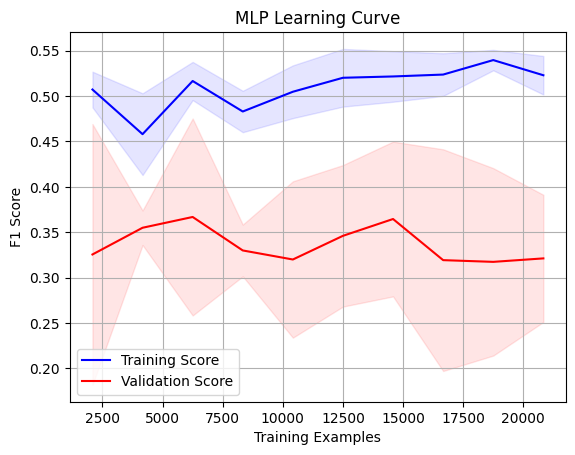

In [16]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring=f1_scorer)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes_abs, train_scores_mean, label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_scores_mean, label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.title('MLP Learning Curve')
plt.legend()
plt.grid(True)
plt.show()